In [2]:
%matplotlib inline

- 回归
- 线性分类
- 逻辑回归的正则化
- 逻辑回归的优缺点
- 验证和学习曲线

#### 最小二乘法

线性回归，首先指定一个模型将因变量 $y$ 和特征联系起来，对线性模型而言，依赖函数的形式如下：
$$y = w_0 + \sum_{i=1}^m w_i x_i$$ 
如果为每项观测加上一个虚维度 $x_0 = 1$（比如偏置），那么就可以把 $w_0$ 整合进求和项中，改写为一个略微紧凑的形式：
$$y = \sum_{i=0}^m w_i x_i = \textbf{w}^\text{T} \textbf{x}$$
如果有一个特征观测矩阵，其中矩阵的行是数据集中的观测，那么需要在左边加上一列。由此，线性模型可以定义为：
$$ \textbf y = \textbf X \textbf w + \epsilon$$

其中：
- $\textbf y \in \mathbb{R}^n$：因变量（目标变量）。
- $w$：模型的参数向量（在机器学习中，这些参数经常被称为权重）。
- $\textbf X$：观测及其特征矩阵，大小为 n 行、m+1 列（包括左侧的虚列），其秩的大小为 $\text{rank}\left(\textbf X\right) = m + 1 $。
- $\epsilon $：一个变量，用来表示随机、不可预测模型的错误。

表达式亦可写成：
$$ y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

模型具有如下限制（否则它就不是线性回归了）：
- 随机误差的期望为零：$\forall i: \mathbb{E}\left[\epsilon_i\right] = 0 $;
- 随机误差具有相同的有限方差，这一性质称为等分散性：$\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty $;
- 随机误差不相关：$\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0 $.

权重 $w_i$ 的估计 $\widehat{w}_i$  满足如下条件时，称其为线性：
$$ \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{ni}y_n$$

其中对于 $\forall\ k\ $，$\omega_{ki}$ 仅依赖于 $X$ 中的样本。由于寻求最佳权重的解是一个线性估计，这一模型被称为线性回归。
再引入一项定义：当期望值等于估计参数的真实值时，权重估计被称为无偏（unbiased）：
$$ \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

计算这些权重的方法之一是普通最小二乘法（OLS）。OLS 可以最小化因变量实际值和模型给出的预测值之间的均方误差：
$$ \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}$$

为了解决这一优化问题，需要计算模型参数的导数。将导数设为零，然后求解关于 $\textbf w$ 的等式，倘若不熟悉矩阵求导，可以参考下面的 4 个式子：
$$\begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \end{array}$$

$$\begin{array}{rcl} \frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \end{array}$$

$$\begin{array}{rcl}\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y} \end{array}$$

$$\begin{array}{rcl} \frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

现在开始计算模型参数的导数：
$$ \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$ \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$
基于上述的定义和条件，可以说，根据高斯-马尔可夫定理，模型参数的 OLS 估计是所有线性无偏估计中最优的，即通过 OLS 估计可以获得最低的方差。

#### 最大似然估计

最大似然估计是解决线性回归问题一种常用方法

#### 偏置-方差分解

线性回归预测的误差性质（可以推广到机器学习算法上）
- 目标变量的真值 $y$ 是确定性函数 $f\left(\textbf{x}\right)$ 和随机误差 $\epsilon$ 之和：$y = f\left(\textbf{x}\right) + \epsilon$。
- 误差符合均值为零、方差一致的正态分布：$\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$。
- 目标变量的真值亦为正态分布：$y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$。
- 试图使用一个协变量线性函数逼近一个未知的确定性函数 $f\left(\textbf{x}\right)$，这一协变量线性函数是函数空间中估计函数 $f$ 的一点，即均值和方差的随机变量。

因此，点 $\textbf{x}$ 的误差可分解为：
$$ \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

为了简洁，省略函数的参数，分别考虑每个变量。根据公式 $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$ 可以分解前两项为：
$$ \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

注意：
$$ \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$ \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

接着处理和的最后一项。由于误差和目标变量相互独立，所以可以将它们分离，写为：
$$ \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

最后，将上述公式合并为：
$$ \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

由此，从上等式可知，任何线性模型的预测误差由三部分组成：
- 偏差（bias）: $\text{Bias}\left(\widehat{f}\right)$ 度量了学习算法的期望输出与真实结果的偏离程度, 刻画了算法的拟合能力，偏差偏高表示预测函数与真实结果差异很大。
- 方差（variance）: $\text{Var}\left(\widehat{f}\right)$ 代表「同样大小的不同的训练数据集训练出的模型」与「这些模型的期望输出值」之间的差异。训练集变化导致性能变化，方差偏高表示模型很不稳定。
- 不可消除的误差（irremovable error）: $\sigma^2$ 刻画了当前任务任何算法所能达到的期望泛化误差的下界，即刻画了问题本身的难度。

尽管无法消除 $\sigma^2$，但我们可以影响前两项。理想情况下，希望同时消除偏差和方差（见下图中左上），但是在实践中，常常需要在偏置和不稳定（高方差）间寻找平衡。
<img src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025218835" width="400">

一般而言，当模型的计算量增加时（例如，自由参数的数量增加了），估计的方差（分散程度）也会增加，但偏置会下降，这可能会导致过拟合现象。另一方面，如果模型的计算量太少（例如，自由参数过低)，这可能会导致欠拟合现象。
<img src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025236837" width="480">

高斯-马尔可夫定理表明：在线性模型参数估计问题中，OLS 估计是最佳的线性无偏估计。这意味着，如果存在任何无偏线性模型 g，可以确信 $Var\left(\widehat{f}\right) \leq Var\left(g\right)$。

#### 线性回归的正则化

低偏置和低方差往往是不可兼得的，所以在一些情形下，会为了稳定性（降低模型的方差）而导致模型的偏置 $\text{Var}\left(\widehat{f}\right)$ 提高。高斯-马尔可夫定理成立的条件之一就是矩阵 $\textbf{X}$ 是满秩的，否则 OLS 的解 $\textbf{w} = \left(\textbf{X}^\text{T} \textbf{X}\right)^{-1} \textbf{X}^\text{T} \textbf{y}$ 就不存在，因为逆矩阵 $\left(\textbf{X}^\text{T} \textbf{X}\right)^{-1}$ 不存在，此时矩阵 $\textbf{X}^\text{T} \textbf{X}$ 被称为奇异矩阵或退化矩阵。这类问题被称为病态问题，必须加以矫正，也就是说，矩阵 $\textbf{X}^\text{T} \textbf{X}$ 需要变成非奇异矩阵（这正是这一过程叫做正则化的原因）。

我们常常能在这类数据中观察到所谓的多重共线性：两个或更多特征高度相关，也就是矩阵 $\textbf{X}$ 的列之间存在类似线性依赖的关系（又不完全是线性依赖）。例如，在「基于特征预测房价」这一问题中，属性「含阳台的面积」和「不含阳台的面积」会有一个接近线性依赖的关系。数学上，包含这类数据的矩阵 $\textbf{X}^\text{T} \textbf{X}$ 被称为可逆矩阵，但由于多重共线性，一些本征值（特征值）会接近零。在 $\textbf{X}^\text{T} \textbf{X}$ 的逆矩阵中，因为其本征值为 $\frac{1}{\lambda_i}$，所以有些本征值会变得特别大。本征值这种巨大的数值波动会导致模型参数估计的不稳定，即在训练数据中加入一组新的观测会导致完全不同的解。为了解决上述问题，有一种正则化的方法称为吉洪诺夫（Tikhonov）正则化，大致上是在均方误差中加上一个新变量：

$$ \begin{array}{rcl} \mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\| \Gamma \textbf{w}\right\|^2\end{array}$$

吉洪诺夫矩阵常常表达为单位矩阵乘上一个系数：$\Gamma = \frac{\lambda}{2} E$。在这一情形下，最小化均方误差问题变为一个 L2 正则化问题。若对新的损失函数求导，设所得函数为零，据  $\textbf{w}$ 重整等式，便得到了这一问题的解：

$$ \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

这类回归被称为岭回归（ridge regression）。岭为对角矩阵，在 $\textbf{X}^\text{T} \textbf{X}$ 矩阵上加上这一对角矩阵，以确保能得到一个正则矩阵。

<img width='500px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025255573">

#### 线性分类

线性分类器背后的基本思路是，目标分类的值可以被特征空间中的一个超平面分开。如果这可以无误差地达成，那么训练集被称为线性可分。

上面已经介绍了线性回归和普通最小二乘法（OLS）。现在考虑一个二元分类问题，将目标分类记为「+1」（正面样本）和「-1」（负面样本）。最简单的线性分类器可以通过回归定义：
$$ a(\textbf{x}) = \text{sign}(\textbf{w}^\text{T}\textbf x)$$

其中：
 - $\textbf{x}$ 是特征向量（包括标识）。
 - $\textbf{w}$ 是线性模型中的权重向量（偏置为 $w_0$）。
 - $\text{sign}(\bullet)$ 是符号函数，返回参数的符号。
 - $a(\textbf{x})$ 是分类 $\textbf{x}$ 的分类器。

#### 基于逻辑回归的线性分类器

逻辑回归是线性分类器的一个特殊情形，但逻辑回归有一个额外的优点：它可以预测样本 $\textbf{x}_\text{i}$ 为分类「+」的概率 $p_+$：
$$ p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$
逻辑回归不仅能够预测样本是「+1」还是「-1」，还能预测其分别是「+1」和「-1」的概率是多少。对于很多业务问题（比如，信用评分问题）而言，这是一个非常重要的优点。下面是一个预测贷款违约概率的例子。

<img width='300px;' src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025438757'>

银行选择一个阈值 $p_*$ 以预测贷款违约的概率（上图中阈值为0.15），超过阈值就不批准贷款。
为了预测概率 $p_+ \in [0,1]$，使用 OLS 构造线性预测：
$$b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$$

为了将所得结果转换为 [0,1] 区间内的概率，逻辑回归使用下列函数进行转换： 
$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$

逻辑回归预测一个样本分配为「+」分类的概率（假定已知模型的特征和权重），这一预测过程是通过对权重向量和特征向量的线性组合进行 sigmoid 变换完成的，公式如下：
$$ p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

In [1]:
!pip3 -V

pip 20.2.4 from /Users/gaozhiyong/Documents/pyenv/venv3.8.2/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

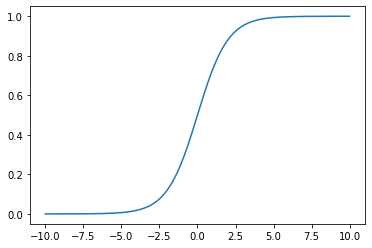

In [3]:
def sigma(z):
    return 1. /(1+ np.exp(-z))

xx = np.linspace(-10,10,1000)
plt.plot(xx,[sigma(x) for x in xx])

#### 逻辑回归的L2 正则化

逻辑回归的 L2 正则化和岭回归的情况基本一样。代替 $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$，只用最小化下式：
$$ \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

在逻辑回归中，通常使用正则化系数的倒数 $C = \frac{1}{\lambda}$：
$$ \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

#### 逻辑回归的正则化示例 

In [4]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# 读取数据集，
data = pd.read_csv('./dataset/microchip_tests.txt',header=None,
                  names=('test1','test2','released')
                  )

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [6]:
data.shape

(118, 3)

In [7]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
# 分离训练集 和目标分类标签
X = data[['test1','test2']].values
y = data['released'].values

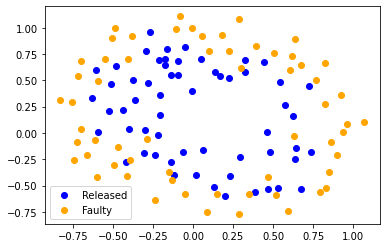

In [9]:
# 绘制数据
plt.scatter(X[y==1,0], X[y==1,1] , c='blue' , label='Released')
plt.scatter(X[y==0,0], X[y==0,1], c='orange', label='Faulty')
plt.legend()

- x[:,n]表示在全部数组（维）中取第n个数据，直观来说，x[:,n]就是取所有集合的第n个数据
- x[n,:]表示在n个数组（维）中取全部数据，直观来说，x[n,:]就是取第n集合的所有数据
- x[:,m:n]，即取所有数据集的第m到n-1列数据

In [10]:
X[:,0]

array([ 0.051267 , -0.092742 , -0.21371  , -0.375    , -0.51325  ,
       -0.52477  , -0.39804  , -0.30588  ,  0.016705 ,  0.13191  ,
        0.38537  ,  0.52938  ,  0.63882  ,  0.73675  ,  0.54666  ,
        0.322    ,  0.16647  , -0.046659 , -0.17339  , -0.47869  ,
       -0.60541  , -0.62846  , -0.59389  , -0.42108  , -0.11578  ,
        0.20104  ,  0.46601  ,  0.67339  , -0.13882  , -0.29435  ,
       -0.26555  , -0.16187  , -0.17339  , -0.28283  , -0.36348  ,
       -0.30012  , -0.23675  , -0.06394  ,  0.062788 ,  0.22984  ,
        0.2932   ,  0.48329  ,  0.64459  ,  0.46025  ,  0.6273   ,
        0.57546  ,  0.72523  ,  0.22408  ,  0.44297  ,  0.322    ,
        0.13767  , -0.0063364, -0.092742 , -0.20795  , -0.20795  ,
       -0.43836  , -0.21947  , -0.13882  ,  0.18376  ,  0.22408  ,
        0.29896  ,  0.50634  ,  0.61578  ,  0.60426  ,  0.76555  ,
        0.92684  ,  0.82316  ,  0.96141  ,  0.93836  ,  0.86348  ,
        0.89804  ,  0.85196  ,  0.82892  ,  0.79435  ,  0.5927

In [11]:
# 定义一个函数来显示分类器的 分界线
def plot_boundary(clf,X,y, grid_step=0.1, ploy_featurizer=None):
    x_min ,x_max = X[:,0].min() - .1, X[:,0].max() +.1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() +.1
    xx,yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step),
        np.arange(y_min, y_max, grid_step)
    )
    
    # 在[x_min ,x_max] 和 [y_min, y_max] 的每一点都用它自己的颜色来对应
    Z = clf.predict(ploy_featurizer.transform(np.c_[xx.ravel(),yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx,yy,Z , cmap=plt.cm.Paired)

In [12]:
poly = PolynomialFeatures(degree =7)
X_poly = poly.fit_transform(X)

In [13]:
X_poly.shape

(118, 36)

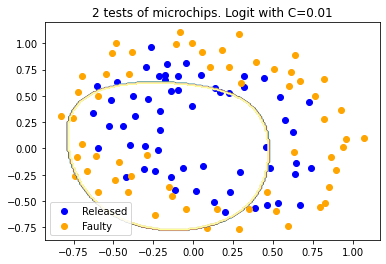

In [14]:
# 训练逻辑回归模型， 正则系数 C= 1/ 100
C= 1e-2
logit = LogisticRegression(C=C,random_state=17)
logit.fit(X_poly,y)

plot_boundary(logit,X,y,grid_step=.01, ploy_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

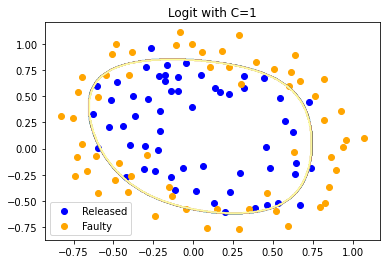

In [15]:
# 尝试减小正则化， 将C增加到1
C=1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly,y)

plot_boundary(logit, X,y,grid_step=.005, ploy_featurizer=poly)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', label='Released')
plt.scatter(X[y==0,0], X[y==0,1], c='orange', label='Faulty')
plt.title('Logit with C=%s' % C)
plt.legend()

0.8728813559322034


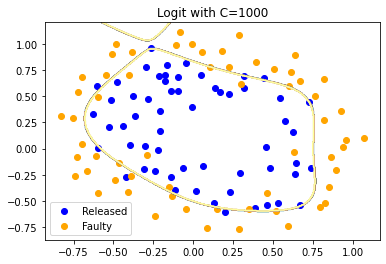

In [16]:
C=1000
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly,y)

plot_boundary(logit, X,y,grid_step=.005, ploy_featurizer=poly)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', label='Released')
plt.scatter(X[y==0,0], X[y==0,1], c='orange', label='Faulty')
plt.title('Logit with C=%s' % C)
print(logit.score(X_poly,y))
plt.legend()

0.8728813559322034


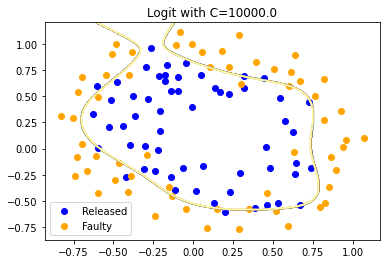

In [17]:
C=1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly,y)

plot_boundary(logit, X,y,grid_step=.005, ploy_featurizer=poly)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', label='Released')
plt.scatter(X[y==0,0], X[y==0,1], c='orange', label='Faulty')
plt.title('Logit with C=%s' % C)
print(logit.score(X_poly,y))
plt.legend()

为了讨论上述的这些结果，改写一下逻辑回归的优化函数：
$$ J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

其中：
- $\mathcal{L}$ 是对整个数据集的总逻辑损失函数
- $C$ 是反向正则化系数

总结：
- 参数 $C$ 越大，模型中可恢复的数据之间的关系就越复杂（直观地说，$C$ 对应模型的「复杂度」：模型能力）。
- 如果正则化过强，即 $C$ 值很小，最小化逻辑损失函数问题的解（权重）可能过小或为零。这样的模型对误差的「惩罚」也不够（即在上面的函数 $J(X,y,w)$ 中，权重的平方和过高，导致误差 $L$ 较大）。在这一情形下，模型将会欠拟合。
- 如果正则化过弱，即 $C$ 值很大，最小化逻辑损失函数问题的解可能权重过大。在这一情形下， $L$ 对函数 $J(X,y,w)$ 贡献较大，导致过拟合。
- $C$ 是一个超参数，逻辑回归不会自动学习调整 $C$ 的值，我们可以通过交叉验证来人工选择较好的 $C$ 值。

#### 正则化参数的调整

对上述例子中正则化参数 $C$ 进行调参。
- 使用 `LogisticRegressionCV()` 方法进行网格搜索参数后再交叉验证，`LogisticRegressionCV()` 是专门为逻辑回归设计的。
- 如果想对其他模型进行同样的操作，可以使用 `GridSearchCV()` 或 `RandomizedSearchCV()` 等超参数优化算法。

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
c_values = np.logspace (-2,3,500)[50:450:50]

logit_seacher = LogisticRegressionCV(
    Cs=c_values , cv = skf, verbose=1, n_jobs=-1
)
logit_seacher.fit(X_poly,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


LogisticRegressionCV(Cs=array([3.16958209e-02, 1.00462506e-01, 3.18424160e-01, 1.00927151e+00,
       3.19896892e+00, 1.01393946e+01, 3.21376434e+01, 1.01862899e+02]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [19]:
logit_seacher.C_

array([10.13939458])

Text(0, 0.5, 'Mean CV-accuracy')

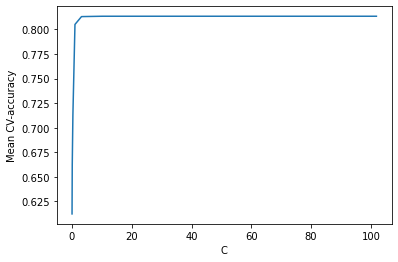

In [20]:
# 查看超参数  𝐶  是如何影响模型的质量的
plt.plot(c_values, np.mean(logit_seacher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')

(0.0, 10.0)

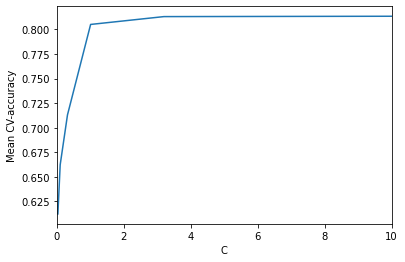

In [21]:
# 仅画出0到10 的验证曲线
plt.plot(c_values, np.mean(logit_seacher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')
plt.xlim(0,10)

#### 逻辑回归的优缺点

通过分析 IMDB 影评的二元分类问题和 XOR 问题来简要说明逻辑回归的优缺点。

##### 分析IMDB 二元分类问题

IMDB 数据集中的训练集包含标记好的影评，其中有 12500 条好评，12500 条差评。
使用词袋模型构建输入矩阵 $X$ ，语料库包含所有用户影评，影评的特征将由整个语料库中每个词的出现情况来表示。
下图展示了这一思路：

<img width='500px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025533901">

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_files

In [23]:
!tar -zxf "./dataset/aclImdb_v1.tar.gz"

In [24]:
PATH_TO_IMDB = "./aclImdb/"
reviews_train = load_files(
    os.path.join(PATH_TO_IMDB,"train"),
    categories=['pos','neg']
)

text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(
    os.path.join(PATH_TO_IMDB,"test"),
    categories=['pos','neg']
)
text_test, y_test = reviews_test.data, reviews_test.target

In [25]:
# 看看训练集和测试集中各有多少条数据
len(text_train)
np.bincount(y_train)

len(text_test)
np.bincount(y_test)

array([12500, 12500])

In [26]:
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

y_train=0 表示影评是差评，y_train=1 表示影评是好评

In [27]:
y_train[1]

0

##### 单词的简单计数
使用 `CountVectorizer()` 创建包含所有单词的字典。

In [28]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

74849

In [29]:
cv.get_feature_names()[:50]

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m']

In [30]:
cv.get_feature_names()[50000:50050]

['pincher',
 'pinchers',
 'pinches',
 'pinching',
 'pinchot',
 'pinciotti',
 'pine',
 'pineal',
 'pineapple',
 'pineapples',
 'pines',
 'pinet',
 'pinetrees',
 'pineyro',
 'pinfall',
 'pinfold',
 'ping',
 'pingo',
 'pinhead',
 'pinheads',
 'pinho',
 'pining',
 'pinjar',
 'pink',
 'pinkerton',
 'pinkett',
 'pinkie',
 'pinkins',
 'pinkish',
 'pinko',
 'pinks',
 'pinku',
 'pinkus',
 'pinky',
 'pinnacle',
 'pinnacles',
 'pinned',
 'pinning',
 'pinnings',
 'pinnochio',
 'pinnocioesque',
 'pino',
 'pinocchio',
 'pinochet',
 'pinochets',
 'pinoy',
 'pinpoint',
 'pinpoints',
 'pins',
 'pinsent']

In [31]:
# 使用单词的索引编码训练集的句子， 用稀疏矩阵保持
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [32]:
text_train[19726]

b'This movie is terrible but it has some good effects.'

In [33]:
X_train[19726].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
        66562], dtype=int32))

In [34]:
X_train[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
       66562], dtype=int32)

In [35]:
# 对测试集应用同样的操作
X_test = cv.transform(text_test)

In [36]:
# 使用逻辑回归训练模型
logit = LogisticRegression(
    solver='lbfgs',n_jobs=-1, random_state=7
)
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=7)

In [37]:
# 训练完成后，查看训练集和测试集上的准确率 Accuarcy
logit.score(X_train,y_train) , logit.score(X_test,y_test)

(0.98176, 0.863)

In [43]:
# 可视化模型的系数
def visualize_coefficients(classifier , feature_names, n_top_features=25):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coffficients = np.argsort(coef)[:n_top_features]
    
    interesting_coefficients = np.hstack([negative_coffficients,positive_coefficients])
    
    plt.figure(figsize=(15,5))
    colors = ["red" if c<0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features),
            coef[interesting_coefficients],
            color= colors
           )
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1,1+2 * n_top_features),
               feature_names[interesting_coefficients],
               rotation = 60,
               ha='right'
              )
    

In [52]:
def plot_grid_scores(grid,param_name):
    plt.plot(grid.param_grid[param_name],
             grid.cv_results_['mean_train_score'],
             color='green',
             label='train'
            )
    plt.plot(grid.param_grid[param_name],
             grid.cv_results_['mean_test_score'],
             color='red',
             label='test'
            )
    plt.legend()

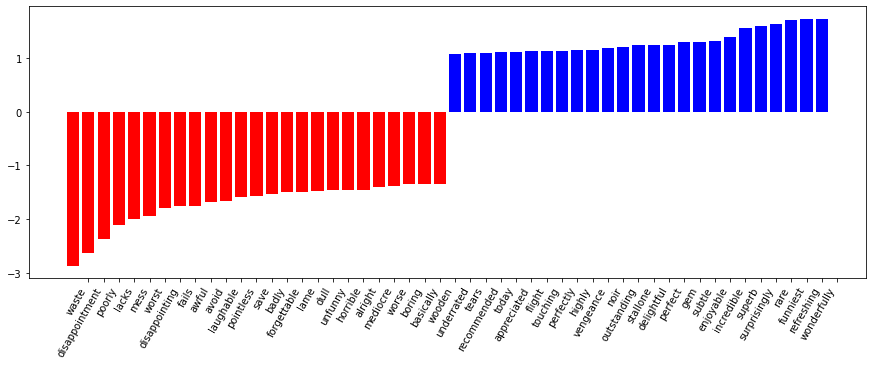

In [44]:
visualize_coefficients(logit, cv.get_feature_names())

对逻辑回归的正则化系数，进行调参
- make_pipeline() 确保的序列顺序 在训练数据上应用 CountVectorizer() 方法， 然后训练逻辑回归模型

In [48]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(),
                                LogisticRegression(solver='lbfgs',
                                                  n_jobs=1,
                                                  random_state=7)
                            )
text_pipe_logit.fit(text_train,y_train)

text_pipe_logit.score(text_test,y_test)

0.8644

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid_logit = {
    'logisticregression__C':np.logspace(-5,0,6)[4:5]
}
grid_logit = GridSearchCV(text_pipe_logit,
                         param_grid_logit,
                         return_train_score=True,
                         cv=3,
                         n_jobs=-1)
grid_logit.fit(text_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=1,
                                                           random_state=7))]),
             n_jobs=-1, param_grid={'logisticregression__C': array([0.1])},
             return_train_score=True)

- 查看最佳C， 以及相应的交叉验证评分

In [50]:
grid_logit.best_params_,grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8855599340364303)

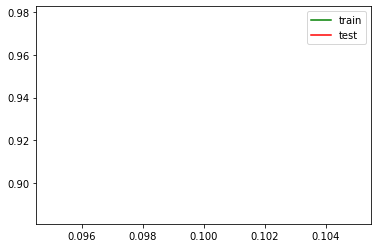

In [53]:
plot_grid_scores(grid_logit,'logisticregression__C')

In [54]:
grid_logit.score(text_test,y_test)

0.87812

###### 换用随即森林来分类

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200,
                               n_jobs=-1,
                               random_state=17)

In [57]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [58]:
forest.score(X_test,y_test)

0.85472

- 上述结果可以见， 相较于随机森林，逻辑回归在IMDB数据集上表现更优

#### XOR问题

- XOR是一个简单的二元分类问题， 其中两个分类呈现对角交叉分布

In [62]:
rng = np.random.RandomState(0)
X = rng.randn(200,2)
# X
y = np.logical_xor(X[:,0] >0 , X[:,1] >0 )
y

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

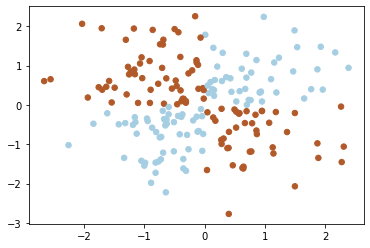

In [63]:
plt.scatter(X[:,0],X[:,1], s=30, c=y, cmap=plt.cm.Paired)

- 显然无法画出一条直线，无差别的将两个分类 分开， 因为逻辑回归在这一任务上的表现很差

In [70]:
def plot_boundary(clf, X,y,plot_title):
    xx,yy = np.meshgrid(np.linspace(-3,3,50),
                       np.linspace(-3,3,50))
    clf.fit(X,y)
    
    Z= clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:,1]
    Z =Z.reshape(xx.shape)
    
    image = plt.imshow(Z,interpolation='nearest',
                      extent=(xx.min(),xx.max(),yy.min(),yy.max()),
                      aspect='auto',origin='lower',cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx,yy,Z, levels=[0], linewidths=2, linetypes='--')
    
    plt.scatter(X[:,0],X[:,1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks()
    plt.yticks()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis([-3,3,-3,3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12)

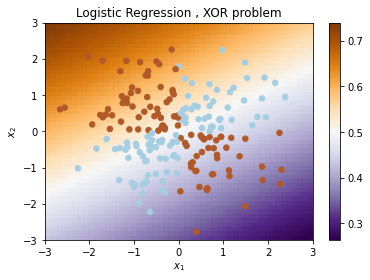

In [71]:
plot_boundary(LogisticRegression(solver='lbfgs'),
             X,
             y,
             "Logistic Regression , XOR problem")

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [73]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                      ('logit', LogisticRegression(solver='lbfgs'))])

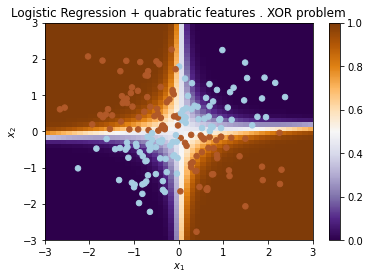

In [74]:
plot_boundary(logit_pipe, X, y, "Logistic Regression + quabratic features . XOR problem")

### 验证和学习曲线

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.model_selection import validation_curve, learning_curve
import matplotlib.pyplot as plt

如果模型的质量不佳，该怎么办？

- 应该让模型更复杂还是更简单？
- 应该加入更多特征吗？
- 是否需要更多数据用户训练？

In [92]:
data = pd.read_csv("./dataset/telecom_churn.csv").drop('State', axis=1)
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [93]:
data['International plan'] = data['International plan'].map({
    'Yes':1,
    'No':0
})

data['Voice mail plan'] = data['Voice mail plan'].map({
    'Yes':1,
    'No':0
})

data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [94]:
y = data['Churn'].astype('int').values
X = data.drop('Churn',axis=1).values
print(y)

print(X)

[0 0 0 ... 0 0 0]
[[128.   415.     0.   ...   3.     2.7    1.  ]
 [107.   415.     0.   ...   3.     3.7    1.  ]
 [137.   415.     0.   ...   5.     3.29   0.  ]
 ...
 [ 28.   510.     0.   ...   6.     3.81   2.  ]
 [184.   510.     1.   ...  10.     1.35   2.  ]
 [ 74.   415.     0.   ...   4.     3.7    0.  ]]


In [95]:
# 使用随机梯度下降 训练逻辑回归
alphas = np.logspace(-2,0,20)
sgd_logit = SGDClassifier(loss='log',
                         n_jobs=-1,
                         random_state=17,
                         max_iter=5)
logit_pipe = Pipeline([('scaler',StandardScaler()),
                      ('poly',PolynomialFeatures(degree=2)),
                      ('sgd_logit',sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X,y,
                                      'sgd_logit__alpha',alphas, cv=5,
                                      scoring='roc_auc')

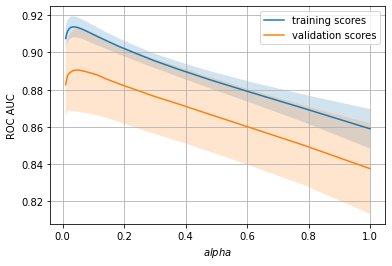

In [96]:
# 绘制ROC_AUC曲线， 查看不同正则化参数下模型在训练集 和测试集上的表现有何不同
def plot_with_err(x, data, **kwargs):
    mu,std = data.mean(1), data.std(1)
    lines = plt.plot(x,mu,'-',**kwargs)
    plt.fill_between(x,mu-std,mu+std, edgecolor='none',
                    facecolor=lines[0].get_color(),
                    alpha=0.2)
    

plot_with_err(alphas,val_train, label='training scores')
plot_with_err(alphas,val_test,label='validation scores')
plt.xlabel('$alpha$')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)

- 简单模型的训练误差 和验证误差很接近，且都比较大； 这就暗示模型欠拟合，参数数量不够多
- 高度复杂模型的训练误差和验证误差 相差很大，  这就暗示模型过拟合 。 当参数量过多或者正则化不够严格时，算法可能被数据中的噪声转移注意力， 没能把握数据的整体趋势

##### 数据对模型的影响

一般而言，模型所用的数据越多越好。
但新数据是否存在任何情况下都有帮助呢？

由于新数据可能难以取得，合理的做法是改变训练集的大小， 然后看模型的质量 与训练数据的数量之间的依赖关系， 这就是【学习曲线】的概念

- 将误差看作训练中所使用的样本数量的函数，模型的参数事先固定

In [99]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05,1,20)
    logit_pipe = Pipeline([('scaler',StandardScaler()),
                          ('poly',PolynomialFeatures(degree=degree)),
                          ('sgd_logit', SGDClassifier(n_jobs=-1,
                                                     random_state=17,
                                                     alpha=alpha,
                                                     max_iter=5))])
    N_train, val_train , val_test = learning_curve(logit_pipe,
                                                  X,
                                                  y,
                                                  train_sizes=train_sizes,
                                                  cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train,label='training scores')
    plot_with_err(N_train, val_test, label = 'validation scores')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC')
    
    plt.legend()
    plt.grid(True)

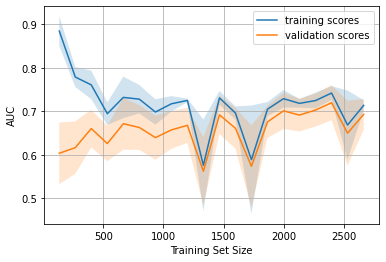

In [100]:
# 把正则化系数设定为较大的数（alpha =10）
plot_learning_curve(degree=2, alpha=10)

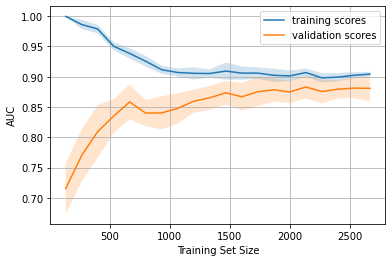

In [101]:
plot_learning_curve(degree=2, alpha=0.05)

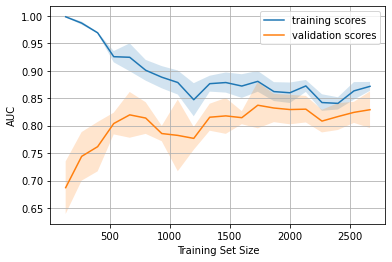

In [103]:
plot_learning_curve(degree=2, alpha=1e-4)

关于验证曲线和学习曲线的结论：
- 训练集上的误差 本身不能说明模型的质量
- 交叉验证误差 除了可以显示模型对数据的拟合程度 ， 还可以显示模型保留了多少对新数据的概括能力
- 验证曲线是一条根据模型复杂度 显示训练集 和验证集结果的曲线；
 - 如果两条线彼此接近， 且两者的误差都很大， 这标志着欠拟合；
 - 如果两条线彼此距离很远， 标志着过拟合
- 学习曲线是 一个根据观测数量显示 训练集和验证集结果的曲线；
 - 如果两条曲线收敛， 那么增加新数据收入不大， 有必要改变模型复杂度
 - 如果两条曲线没有收敛，增加新数据可以改善结果